## Imports

In [1]:
from skrl.envs.wrappers.torch import wrap_env
import gymnasium as gym
from gymnasium.envs.registration import register
from bin_packing_agent import BinPackingAgent
from collections import namedtuple
from bins_states import EMPTY_BIN, EMPTY_SQUARE, ONE_BOX, ONE_BOX_ANTIOVERFIT
import torch
import warnings
warnings.filterwarnings('ignore')

## Environment setup

In [2]:
#set up the environment
register(
     id="PackingEnvNp-v0",
     entry_point="modules:PackingEnvNp",
     max_episode_steps=120
)
env = gym.vector.make('PackingEnvNp-v0', num_envs=30, asynchronous=False)
#env = gym.make('PackingEnvNp-v0')
env = wrap_env(env)
device=env.device
Configuration = namedtuple('Configuration', ['learning_epochs', 'mini_batches', 'discount_factor'])
config = Configuration(learning_epochs = 10, mini_batches = 100, discount_factor = 0.90)

#initialize the BP agent
bpa = BinPackingAgent(env, device, config, "short_sighted", "1level")

[skrl:INFO] Environment class: gymnasium.vector.vector_env.VectorEnv
[skrl:INFO] Environment wrapper: Gymnasium


## Training

In [ ]:
bpa.train(timesteps = 250000)

 15%|███████████▎                                                               | 37879/250000 [48:32<39:12, 90.17it/s]

## Load agent

In [3]:
bpa.load_agent('path')

## Validation

In [ ]:
bpa.validate(rollouts_no = 2, single_rollout_max_length = 240)

## Visualize the probability distribution

tensor([4., 4., 4.,  ..., 0., 0., 0.], device='cuda:0')


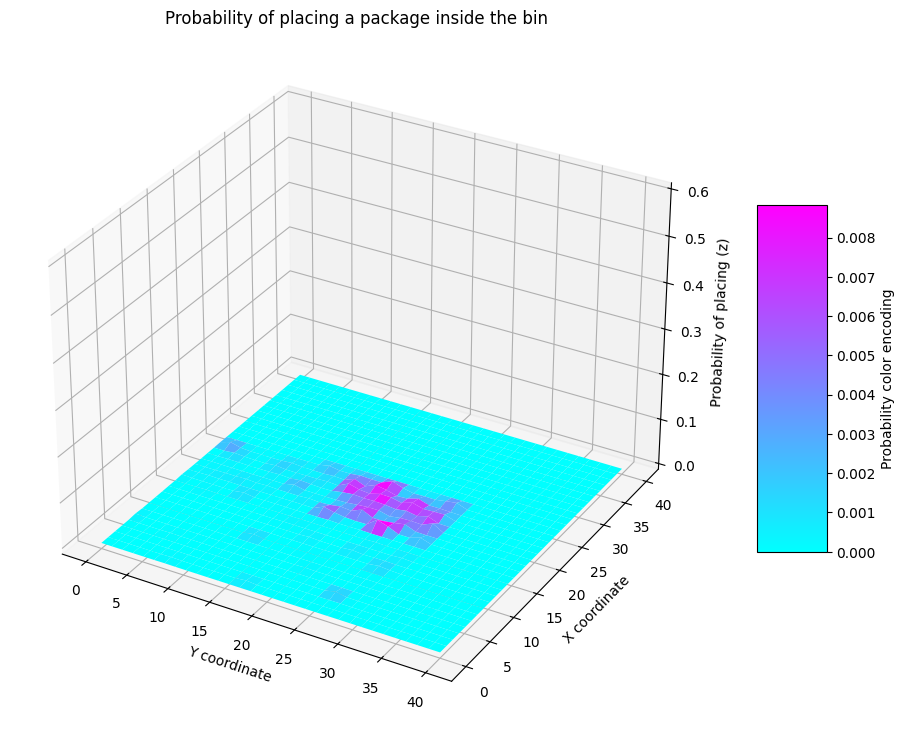

In [4]:
bpa.calc_and_display_prob(input = ONE_BOX_ANTIOVERFIT, save = False)

In [5]:
bpa.get_confidence_interval(n_bootstrap = 10000)

StatisticsError: mean requires at least one data point